In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Read the csv files into a pandas DataFrames
generated_days = 1825
df_generated = pd.read_csv('data/' + str(generated_days) + '/generated_data.csv', index_col="timestamp")

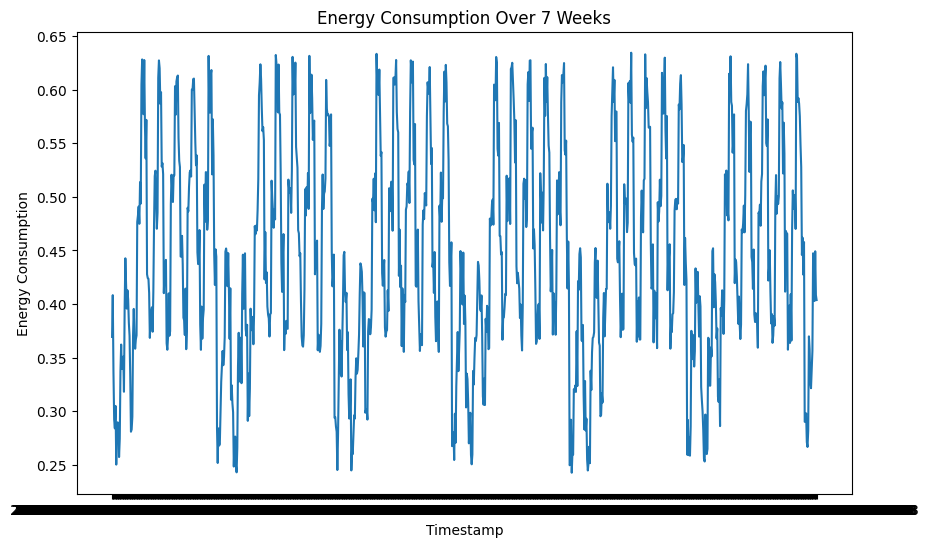

In [8]:
# Assuming each row in the DataFrame represents an hour
hours_per_day = 24
days_per_week = 7
weeks = 7

# Select the data for 7 weeks
df_weeks = df_generated.iloc[hours_per_day * days_per_week: hours_per_day * days_per_week * weeks]

# Plot the energy consumption
plt.figure(figsize=(10,6))
plt.plot(df_weeks['energy_consumption'])
plt.title('Energy Consumption Over 7 Weeks')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.show()

In [9]:
## Training and testing data
split_ratio = 0.8
split_index = int(len(df_generated) * split_ratio)
# Split the data
train_df = df_generated.iloc[:split_index]
test_df = df_generated.iloc[split_index:]

# Print the shapes of the datasets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (35040, 7)
Testing set shape: (8760, 7)


In [11]:
plt.figure(figsize=(10, 6))
plt.plot(train_df.index, train_df["energy_consumption"], label='Training Set')
plt.plot(test_df.index, test_df['energy_consumption'], label='Test Set')
plt.title('Train-Test Split of Energy Consumption Data')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.ylabel('Energy Consumed (kWh)')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [12]:
df = pd.get_dummies(df_generated, columns=[
    "hour",
    "day_of_week",
    "month",
    "season", 
    "time_of_day", 
    "is_weekend"
])

In [13]:
# Print the first 5 rows of the DataFrame
df.head()

,energy_consumption,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,...,season_spring,season_summer,season_winter,time_of_day_afternoon,time_of_day_evening,time_of_day_midnight,time_of_day_morning,time_of_day_night,is_weekend_False,is_weekend_True
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-12-09 18:18:21.587218,0.366618,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2023-12-09 19:18:21.587218,0.377056,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2023-12-09 20:18:21.587218,0.307003,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
2023-12-09 21:18:21.587218,0.280365,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
2023-12-09 22:18:21.587218,0.314678,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [15]:
# Split the data into training and test set
from sklearn.model_selection import train_test_split

X = df.drop(columns=["energy_consumption"])
y = df["energy_consumption"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

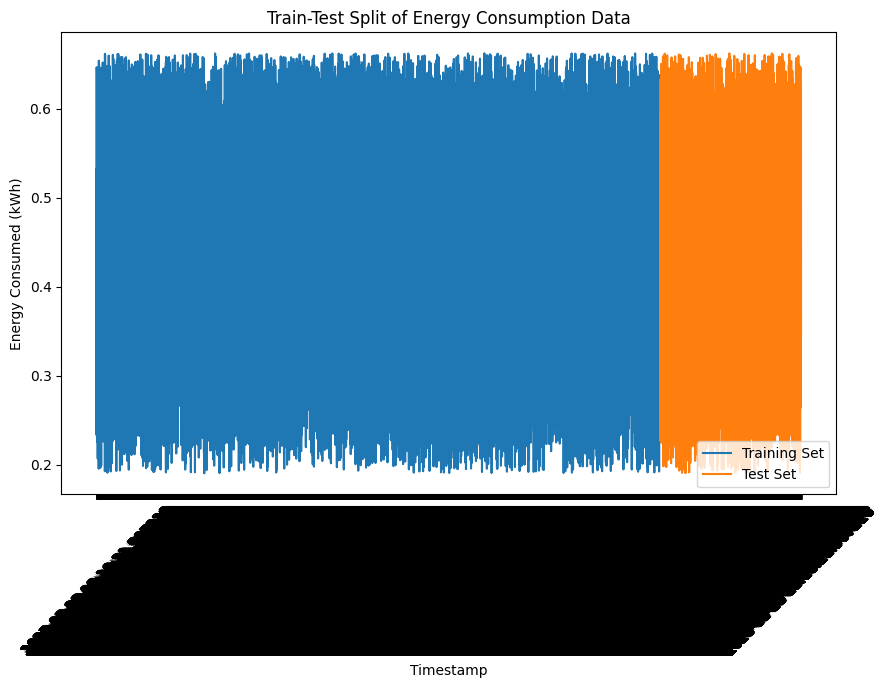

In [16]:
# Plot the training and test set
plt.figure(figsize=(10, 6))
plt.plot(X_train.index, y_train, label='Training Set')
plt.plot(X_test.index, y_test, label='Test Set')
plt.title('Train-Test Split of Energy Consumption Data')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.ylabel('Energy Consumed (kWh)')
plt.legend()
plt.show()


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Intialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
y_pred = rf.predict(X_test)


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("mae", mae)
print("rmse", rmse)


mae 0.015235866841132066
rmse 0.01777331359292749


In [20]:
importances = rf.feature_importances_
print(importances)


[5.77715603e-05 5.10037665e-05 5.44152442e-05 5.86216498e-05
 4.97808404e-05 5.06292324e-05 5.89698245e-05 5.84487178e-05
 5.70346461e-05 6.09582486e-05 6.51609701e-05 6.02164010e-05
 4.81809329e-05 5.11599411e-05 4.73647185e-05 4.90484083e-05
 5.04223906e-05 3.65543734e-05 4.05179459e-05 4.01364534e-05
 5.29033593e-05 5.10084796e-05 5.02150757e-05 4.88498886e-05
 1.75979264e-04 1.69154093e-04 1.80919346e-04 1.63202229e-04
 1.57139243e-04 9.22437230e-05 9.06104629e-05 7.01847260e-05
 7.50397256e-05 5.22049525e-05 5.30990930e-05 7.15625929e-05
 7.47708210e-05 7.46716461e-05 9.21475939e-05 8.86686506e-05
 9.20558539e-05 8.68146897e-05 7.25459718e-05 1.37174651e-01
 3.22807626e-02 2.57998341e-03 2.77198888e-03 2.29181522e-01
 9.15231660e-03 1.66024421e-01 1.04516072e-02 4.41736955e-02
 1.56031420e-01 2.06995243e-01]


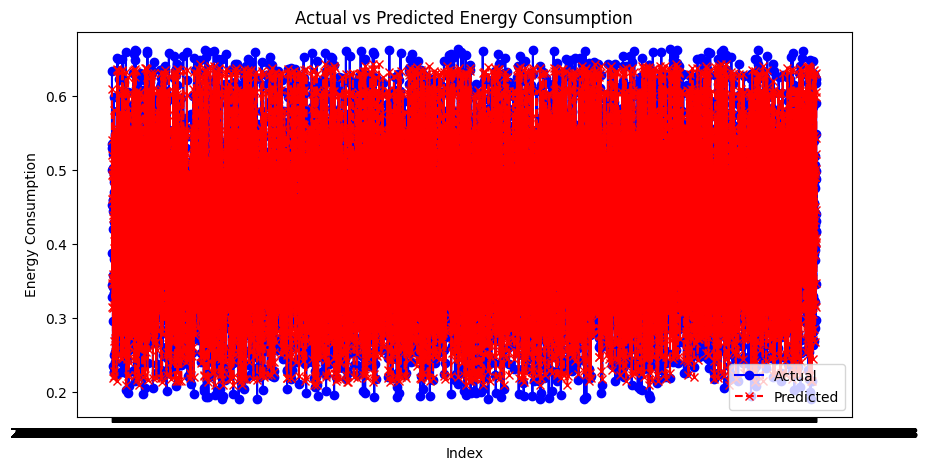

In [21]:
import matplotlib.pyplot as plt

# Assuming 'y_test' is your actual values and 'y_pred' is your predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual', color='blue', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Index')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


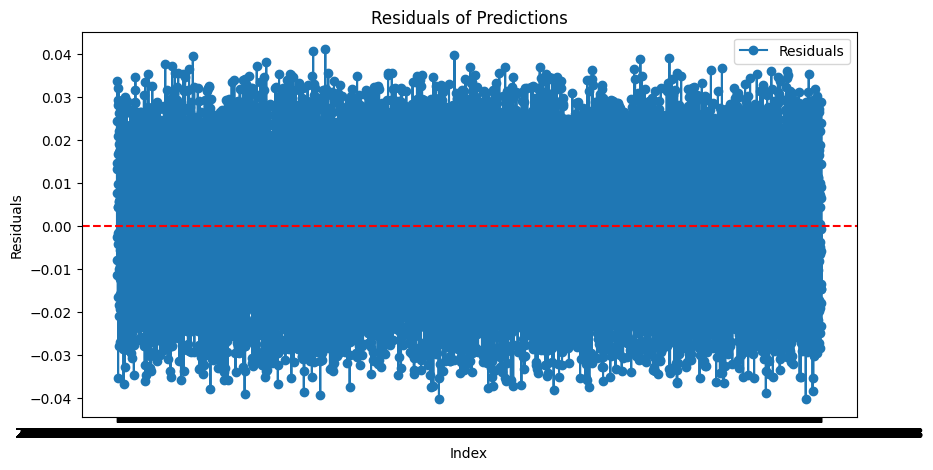

In [22]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.plot(y_test.index, residuals, label='Residuals', marker='o')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [23]:
y_test_day = y_test[0]
y_pred_day = y_pred[0]
print("Actual Energy", y_test_day)
print("Predicted Energy", y_pred_day)

Actual Energy 0.6328181645842357
Predicted Energy 0.6085146404237222


C:\Users\ashfa\AppData\Local\Temp\ipykernel_19012\3247198798.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test_day = y_test[0]


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from datetime import timedelta
# 
# # For demonstration purposes, let's create some dummy data for 'y_test' and 'y_pred'
# # In practice, you would use your actual test set and predictions here
# 
# # Create a date range for one month, sampled hourly
# date_range = pd.date_range(start="2024-01-01", end="2024-01-02", freq='H')
# 
# # Generate some synthetic actual values and predictions
# y_test = pd.Series([i + abs(np.sin(i)) for i in range(len(date_range))], index=date_range)
# y_pred = pd.Series([i + abs(np.cos(i)) for i in range(len(date_range))], index=date_range)
# 
# # Let's select any single day for plotting. We'll take the first day in the series for simplicity.
# specific_day = y_test.index.normalize()[0]
# 
# # Filter the actual and predicted values for this specific day
# actual_day = y_test[specific_day:specific_day + timedelta(days=1)]
# predicted_day = y_pred[specific_day:specific_day + timedelta(days=1)]
# 
# # Create a plot to compare the actual and predicted values for that specific day
# plt.figure(figsize=(10, 5))
# plt.plot(actual_day.index, actual_day, label='Actual', color='blue', marker='o')
# plt.plot(predicted_day.index, predicted_day, label='Predicted', color='red', linestyle='--', marker='x')
# plt.title(f'Actual vs Predicted Energy Consumption for {specific_day.date()}')
# plt.xlabel('Time')
# plt.ylabel('Energy Consumption')
# plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# plt.legend()
# plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
# plt.show()


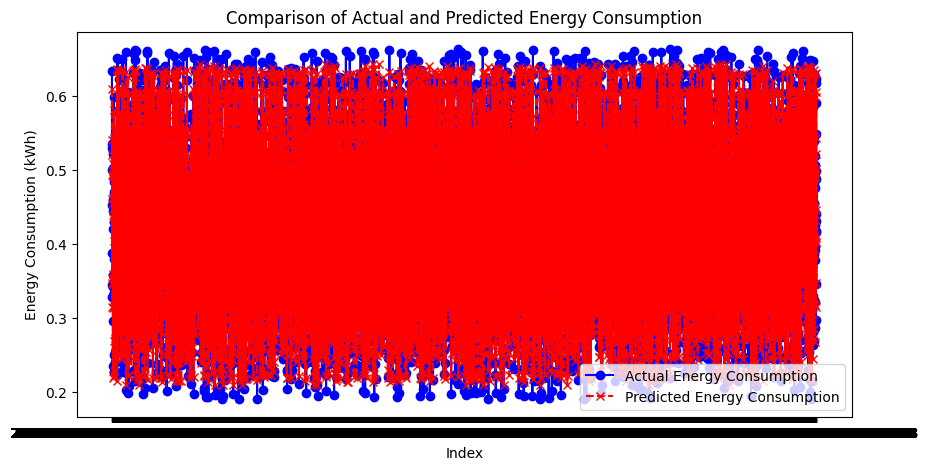

In [25]:
import matplotlib.pyplot as plt

# Convert y_pred to a DataFrame for easy plotting and set its index to match y_test's index
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=['Predicted Energy Consumption'])

# Plot the actual vs predicted energy consumption
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual Energy Consumption', color='blue', marker='o')
plt.plot(y_pred_df.index, y_pred_df['Predicted Energy Consumption'], label='Predicted Energy Consumption', color='red', linestyle='--', marker='x')
plt.title('Comparison of Actual and Predicted Energy Consumption')
plt.xlabel('Index')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()


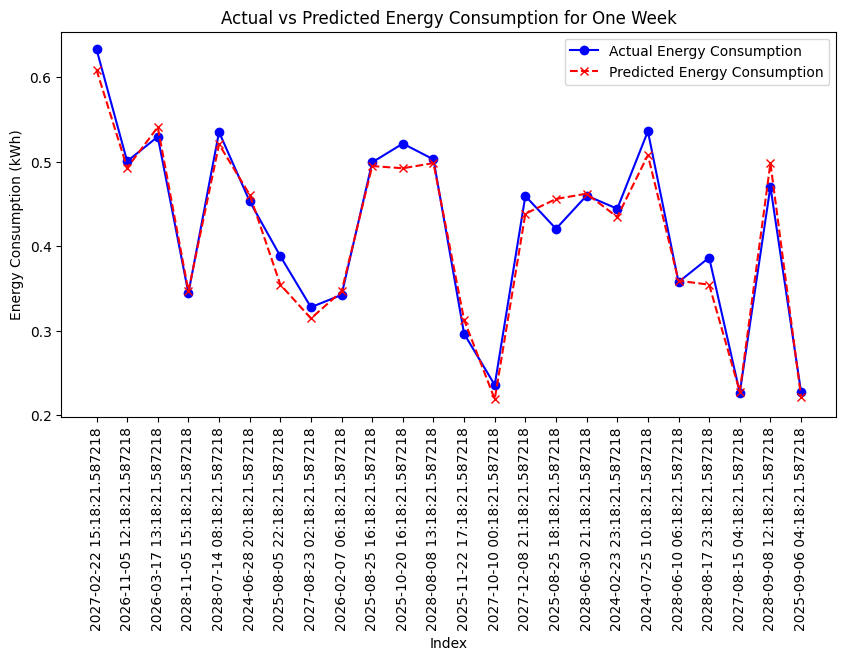

In [30]:
import matplotlib.pyplot as plt

# Convert y_pred to a DataFrame for easy plotting
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=['Predicted Energy Consumption'])

# Select the data for one week assuming each row in y_test is an hour and there are 24*7 hours in a week
one_week_hours = 24 * 1

# Ensure we have enough data to display one week
if len(y_test) >= one_week_hours:
    y_test_week = y_test.iloc[:one_week_hours]
    y_pred_week = y_pred_df.iloc[:one_week_hours]
else:
    print("Not enough data to display one week.")
    y_test_week = y_test
    y_pred_week = y_pred_df

# Plot the actual vs predicted energy consumption for one week
plt.figure(figsize=(10, 5))
plt.plot(y_test_week.index, y_test_week, label='Actual Energy Consumption', color='blue', marker='o')
plt.plot(y_pred_week.index, y_pred_week['Predicted Energy Consumption'], label='Predicted Energy Consumption', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Energy Consumption for One Week')
plt.xlabel('Index')
plt.xticks(rotation=90)
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()


In [33]:
from utils import determine_season, determine_time_of_day
import pandas as pd
from datetime import datetime

# Your future date as a string
future_date_str = '2027-12-09 11:18:11'  # Replace with your actual date and time

# Convert the string to a datetime object
future_date = datetime.strptime(future_date_str, '%Y-%m-%d %H:%M:%S')

# Create a DataFrame to hold your features, with the same structure as your training data
# This should include all necessary dummy variables and should be initialized to 0
future_features = pd.DataFrame(0, index=[0], columns=X_train.columns)

future_features.head()

# Now you would set the appropriate features based on the future_date
# For example:
future_features['hour_' + str(future_date.hour)] = 1
future_features['day_of_week_' + str(future_date.weekday())] = 1
future_features['month_' + str(future_date.month)] = 1
future_features['season_' + str(determine_season(future_date))] = 1
future_features['time_of_day_' + str(determine_time_of_day(future_date))] = 1
future_features['is_weekend_' + str(future_date.weekday()>=5)] = 1

# Ensure that the DataFrame only contains the columns expected by the model
# Any additional columns should be dropped, and missing columns should be added (filled with 0s)
future_features = future_features.reindex(columns=X_train.columns).fillna(0)
# 
# # Use the model to predict
predicted_energy = rf.predict(future_features)
# 
# # Output the prediction
print("Predicted Energy Consumption for {}: {:.2f} kWh".format(future_date_str, predicted_energy[0]))


Predicted Energy Consumption for 2027-12-09 11:18:11: 0.49 kWh
